Elijah Burns <br/>
Phys 434 <br/>
Lab 6

**Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]**

In [32]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from pyuvdata import UVData

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [33]:
hf = h5py.File('hera_data.uvh5', 'r')
hf.keys()

<KeysViewHDF5 ['Data', 'Header']>

In [34]:
data = np.array(hf.get('Data'))
print(data)

['flags' 'nsamples' 'visdata']


In [35]:
hf.close()

In [36]:
uv = UVData()
uv.read('hera_data.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [37]:
pairs = uv.get_antpairs()
pairs[0][1]
dat1 = []

for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1,ant2))
    for j in range(1536):
        dat1.append(dat[17][j])
print(len(dat1))

1022976


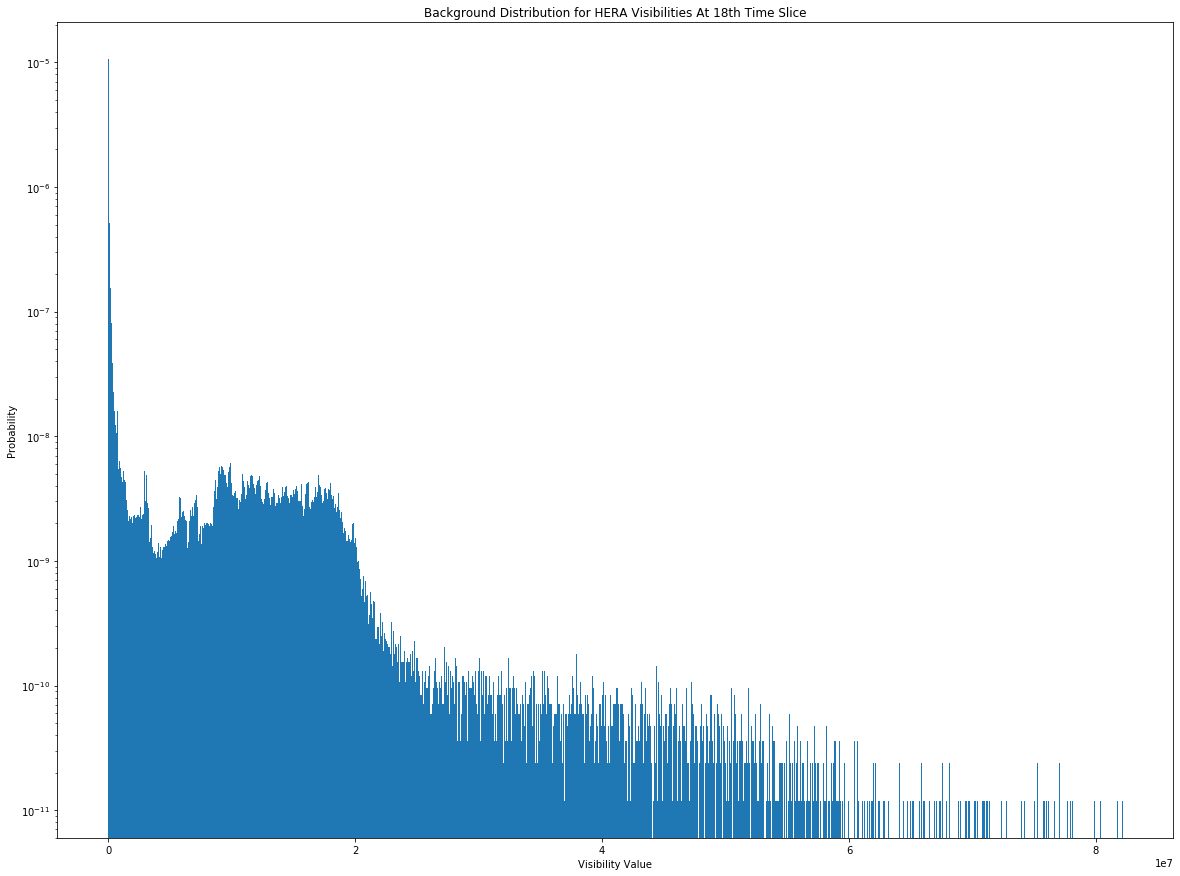

In [38]:
plt.hist(dat1, density = True, bins =1000)
plt.yscale('log')
plt.xlabel('Visibility Value')
plt.ylabel('Probability')
plt.title('Background Distribution for HERA Visibilities At 18th Time Slice')
plt.show()

In [39]:
prob5sigma = 1 - 1/(3.5e6)
print('5 Sigma Value',stats.gamma.ppf(q = prob5sigma, a = 1, loc = 0, scale = 1e7))

5 Sigma Value 150682735.2659742


The 5 sigma visibility value for this data distribution is 1.5e8. <br/>
We use the gamma function here to fit to a generic distribution, and when a is set to 1, the gamma function is reduced to an exponential distribution.

**Problem 2**
**Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.**

**a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.**

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

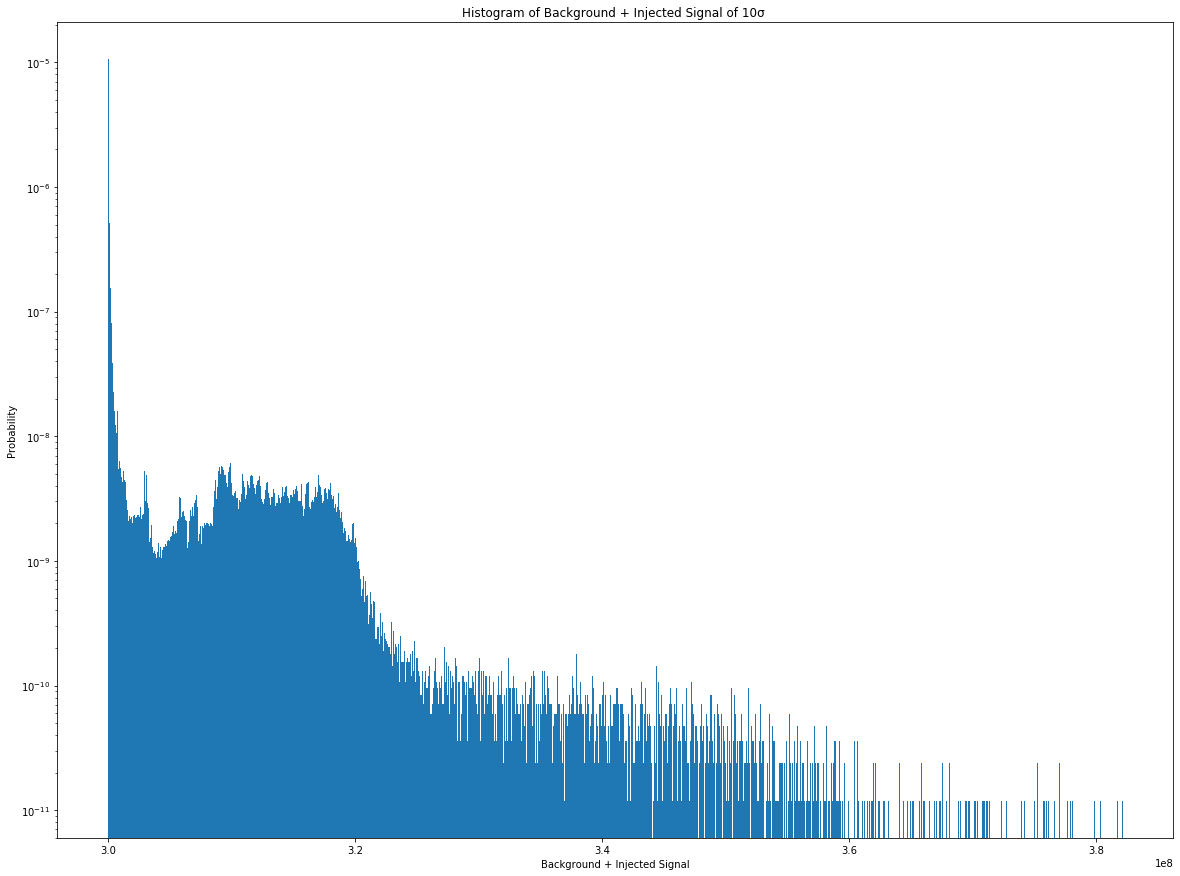

In [40]:
sigknown = 3e8
dat2 = []
for i in range(1022976):
    dat2.append(dat1[i]+sigknown)
plt.hist(dat2, density = True, bins = 1000)
plt.yscale('log')
plt.xlabel('Background + Injected Signal')
plt.ylabel('Probability')
plt.title('Histogram of Background + Injected Signal of 10σ ')
plt.show()

Part 2a Answer: <br/>
Since the injected signal was added to each visibility value, the new histogram shows us the background plus the value of the signal, if the signal was constant and showed up on every visiblity measurement. The shape of this histogram is the same as the original because of the way the signal was injected, which again was by adding the signal value to each of the visibility measurements.

Part 2b Answer: <br/>
The observed signal is biased because the original background distribution was biased, and so it is not symmetric. In other words the observed value is not equally likely to be stronger or weaker than the true injected signal, it is more likely to be greater than the true injected signal. This is because we are using the absolute values of the visibilites, so the observed signal will never be less than the true signal.

**Problem 3 Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5 σ (30 σ or more). You will want to follow the work you did for Homework 5 very closely.**

**a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data**

**b) For the same injected signal power as in problem 2, show that you get the same answer.**

**c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5 σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.**

**d) For your observed signal, what is the 1 σ uncertainty on the true signal strength?**

**e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?**

In [41]:
signal = stats.uniform.rvs(loc = 0, scale = 9e8, size = 1022976)

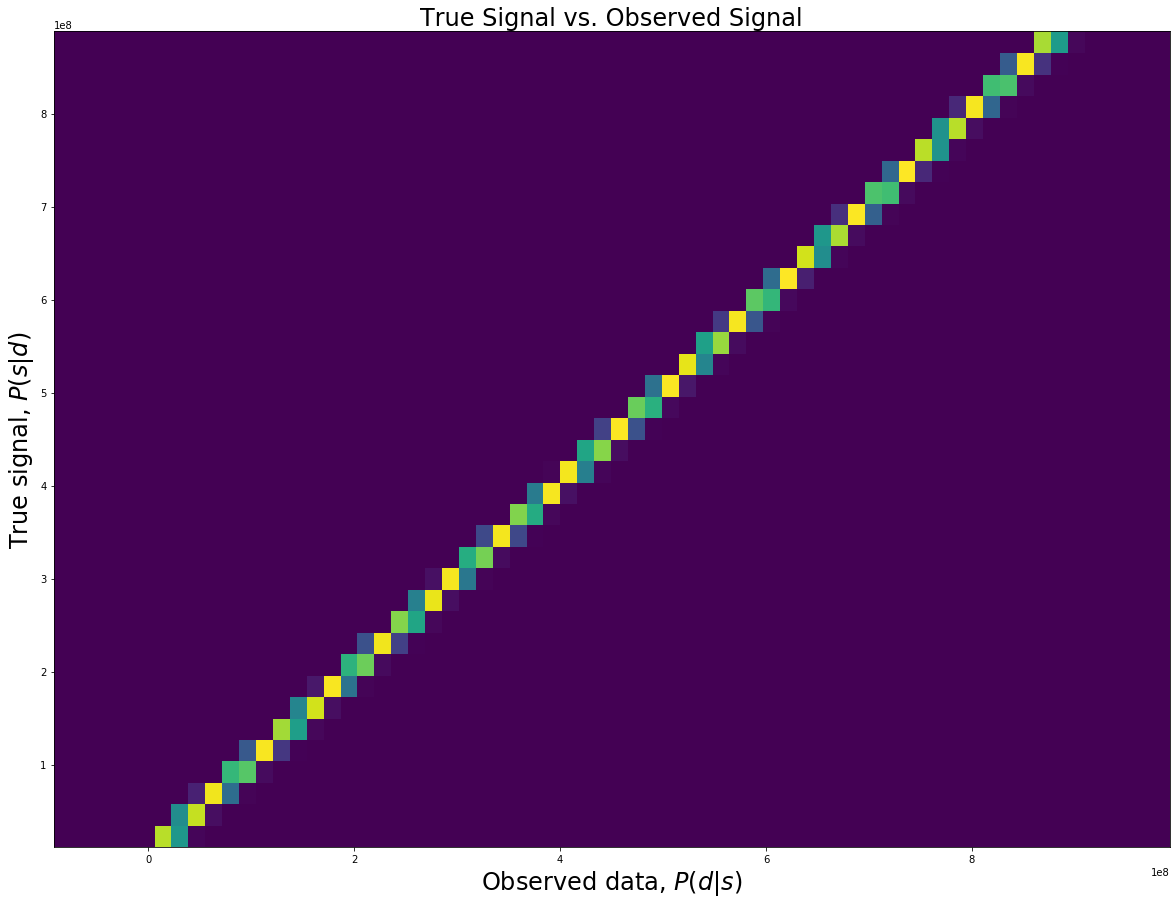

In [42]:
data = dat1 + signal

signaledges = np.linspace(0,9e8,40)
dataedges = np.linspace(-1e8,1e9,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True Signal vs. Observed Signal', fontsize = 24)
plt.show()

Part 3a Answer: <br/>
The 2D histogram above shows what range of values the true signal might be given a concrete observed value, and vice versa. The true signal is created through a uniform distribution, in other words all values in the range for the uniform distribution are equally likely to appear. The observed data is created by adding the background distribution and the uniform distribution together. Important to note, unlike homework 5 we don't see any observed data to the left of zero because we our visiblity values are absolute, so they will never be negative.

311538461.53846157


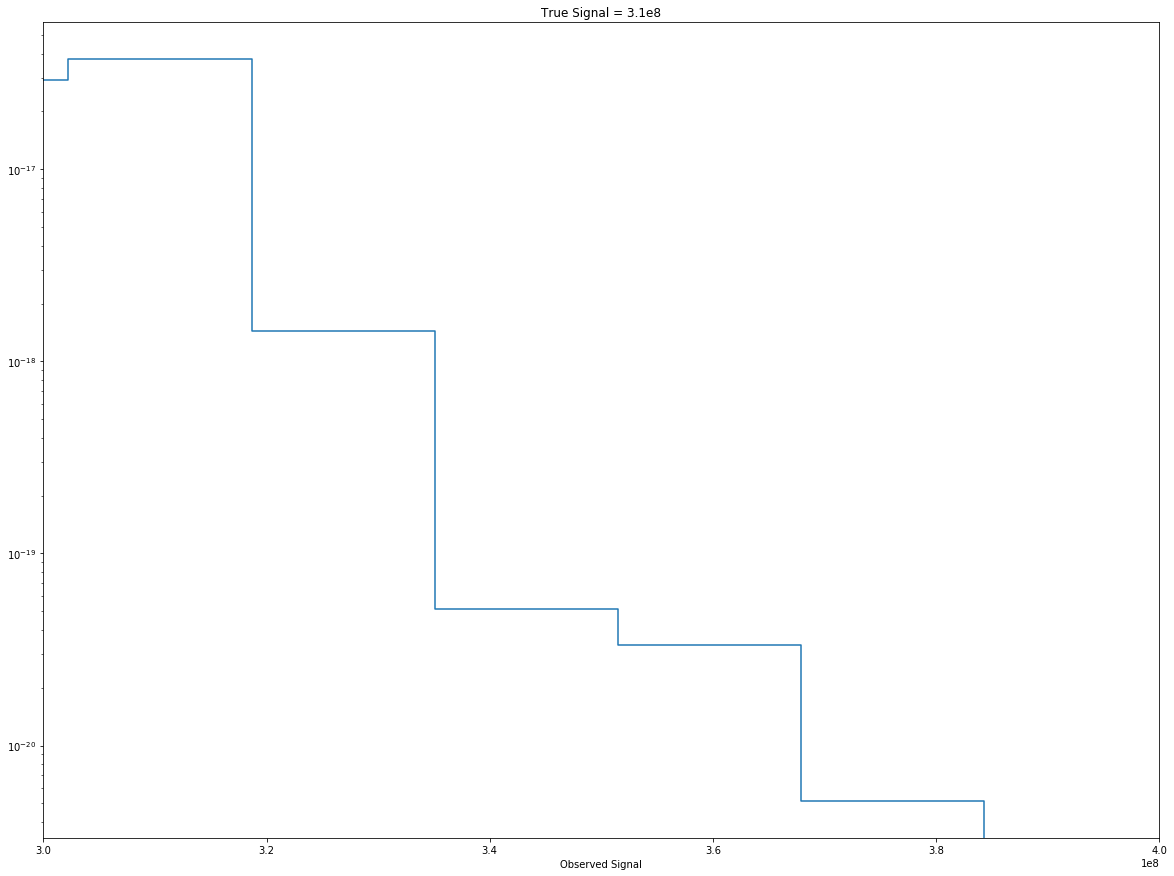

In [43]:
sigindex = 13
print(signalcenters[sigindex])
plt.step(datacenters,Psd[:,sigindex])
plt.yscale('log')
plt.title('True Signal = 3.1e8')
plt.xlabel('Observed Signal')
plt.xlim(3e8,4e8)
plt.show()

Part 3b Answer: <br/>
Although this is a stair plot, and the result in part 2 was given as a histogram, the shapes of the two are quite similar, a large grouping of data on the left side, and a gradual decrease as the values increase. The stair plot above doesn't look exactly like the histogram from part 2 because the histogram had many bins, so it was able to create a more detailed representation.

827611940.2985075


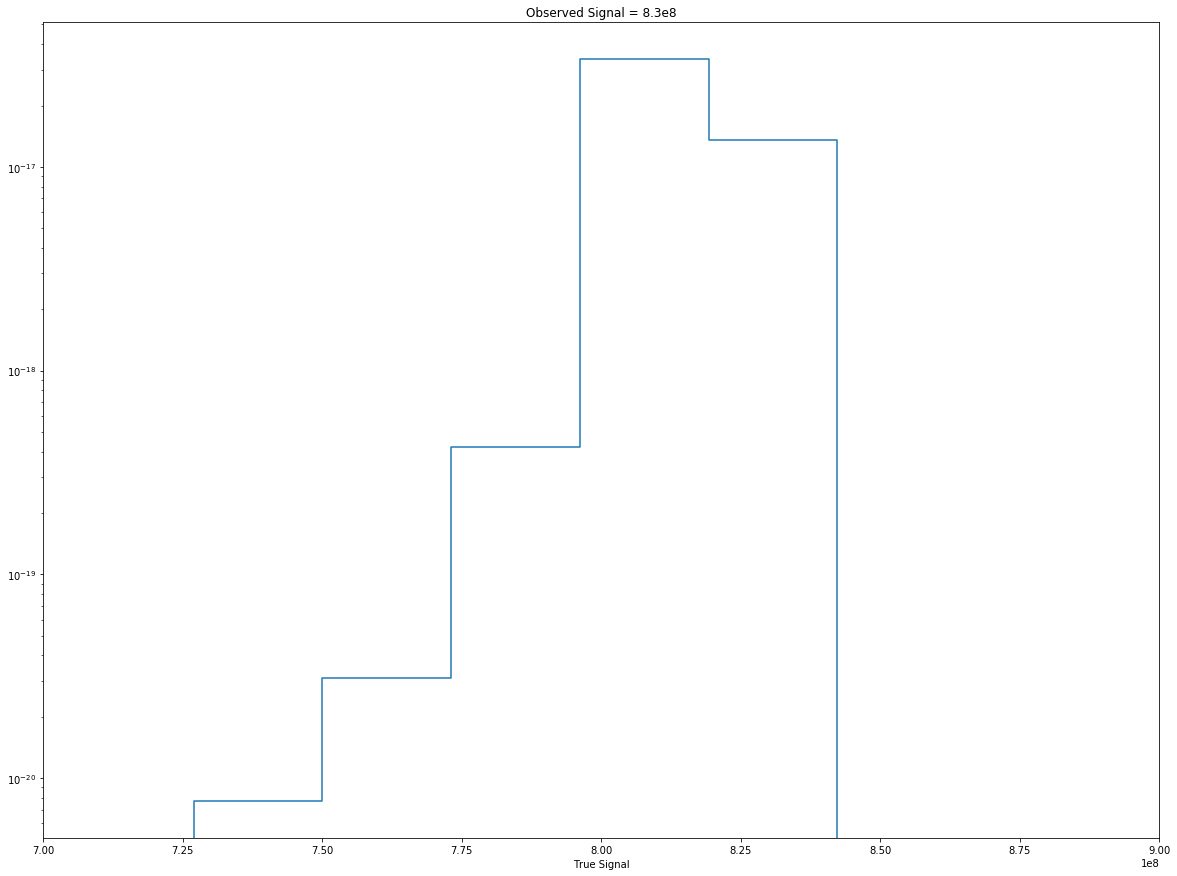

In [44]:
dataindex = 56
print(datacenters[dataindex])
plt.step(signalcenters,Psd[dataindex,:])
plt.yscale('log')
plt.xlabel('True Signal')
plt.title('Observed Signal = 8.3e8')
plt.xlim(7e8,9e8)
plt.show()

Part 3c Answer: <br/>
The observed signal selected is around 30σ, with a value of about 8.3e8. This distribution has a negative skew, and represents the probabilities associated with a range of values the true signal could be if the observed signal is reported as 8.3e8.

Part 3d Answer: <br/>
To determine the 1σ uncertainty on the true signal strength, we need to determine where 34.1% of the data falls on either side of the center of the data distribution. Since the true signal distribution is not symmetrical, the upper bound and the lower bound will not be the same. We can use the gamma function and the cdf to find where these points are for the true signal distribuiton.

In [45]:
upp = stats.gamma.cdf(8.42e8,a=1,loc = 8e8, scale = 1e8)
print(upp)

low = 1 -stats.gamma.cdf(9.07e8, a = 1, loc = 8e8, scale = 1e8)
print()
print()
print(low)

0.3429531801849432


0.34300851741870675


From the gamma function, we see our data distribution is centered around 8e8. To get 34% of the data above, we need to go up to about 8.42e8. To get 34% below, and because the data has a negative skew rather than a postive skew, the lower bound should actually be around 6.93e8 rather than 9.07e8 as the code shows above. We have to switch this number because the exponential distribution that gamma function fits to has a postive skew. <br/>
So the 1σ uncertainty should be reported as: 8e8 + .42e8 & 8e8 - 1.07e8.

Pard 3e Answer: <br/>
The 1σ uncertainty is not symmetric. This makes sense and is for a couple of reasons, the first being that the initial data distribution has a positive skew. So when you find the distribution of the true signal given an observed signal, you'll actually find the distribution to be negative since the background distribution is produced using the absolute values, you'll find the true signal isn't likely to be higher than the observed signal. This is because when you add the true signal to the background to find the observed signal there is no way for the background to be lower than the true signal, so it creates a negatively skewed plot. Since there is this negative skew, it only makes sense that the 1σ uncertainty for that distribution is biased, because you'll have to go farther to the left of the center of the data to get 34% of the data. In other words since more of the data is concentrated to the right of the center, the uncertainty in this region will be less than the uncertainty in the region to the left of the center of the data.